### Content
- data security
- regional segmentation into 4 regions
- exclusion flag for low-activity customers
- customer profiling#
- create fitting visualization
- Aggregate standart values on customer profile level for usage frequency and expenditure
- Visualisations

### 01 import lybaries and df

In [1]:
# importing lybaries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats

In [2]:
# import data sets

path = r'/Users/lennartzeidler/Desktop/Uni/Instacart Basket Analysis 08.10.2022 (4)'

ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_prods_all.pkl'))

checking df

In [3]:
ords_prods_all.shape

(32399732, 26)

In [4]:
ords_prods_all.head()

,user_id,gender,state,age,date_joined,dependants_count,fam_status,income,order_id,order_number,...,product_name,department_id,prices,price_range,busiest_day,busiest_days,busiest_hours,loyalty_flag,avg_price_flag,order_frequency_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Soda,7,9.0,Mid-range product,Regularly busy,Busiest days,Busiest hours,New customer,Low spender,Regular customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Soda,7,9.0,Mid-range product,Regularly busy,Regulary busy days,Busiest hours,New customer,Low spender,Regular customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Soda,7,9.0,Mid-range product,Regularly busy,Busiest days,Busiest hours,New customer,Low spender,Regular customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,0% Greek Strained Yogurt,16,12.6,Mid-range product,Regularly busy,Regulary busy days,Busiest hours,New customer,Low spender,Regular customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,0% Greek Strained Yogurt,16,12.6,Mid-range product,Regularly busy,Slowest days,Busiest hours,New customer,Low spender,Regular customer


### 02 data security


In [5]:
ords_prods_all.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined', 'dependants_count',
       'fam_status', 'income', 'order_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'department_id',
       'prices', 'price_range', 'busiest_day', 'busiest_days', 'busiest_hours',
       'loyalty_flag', 'avg_price_flag', 'order_frequency_flag'],
      dtype='object')

To make a generall statement most of the columns from the customer df is PII Data. That includes the following columns:  
- gender  
- state  
- age  
- date_joined  
- dependants_count  
- fam_status  
- income

### 03 regional segmentation into 4 regions

In [6]:
# define the four regions

 # Northeast
region_1 =['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

# Midwest
region_2 = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

# South
region_3 = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

# West 
region_4 = ['Idaho','Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']


In [7]:
# checking if column and new arrays containe same amount of regions
len(region_1) + len(region_2) + len(region_3) + len(region_4) == len(ords_prods_all['state'].value_counts())

True

In [8]:
#creating new column using loc()

ords_prods_all.loc[ords_prods_all['state'].isin(region_1), 'region'] = 'Region 1'
ords_prods_all.loc[ords_prods_all['state'].isin(region_2), 'region'] = 'Region 2'
ords_prods_all.loc[ords_prods_all['state'].isin(region_3), 'region'] = 'Region 3'
ords_prods_all.loc[ords_prods_all['state'].isin(region_4), 'region'] = 'Region 4'


In [9]:
# check if new column is completly filled
ords_prods_all['region'].value_counts(dropna=False)

Region 3    10790096
Region 4     8291679
Region 2     7596065
Region 1     5721892
Name: region, dtype: int64

In [10]:
# creating crostab containing count of different spenders categorized by region
crosstab = pd.crosstab(ords_prods_all['region'], ords_prods_all['avg_price_flag'], dropna = False)

In [11]:
# creating new crostab column to calculate the relative amount of high spenders

crosstab['relative amount of High spender'] = round((crosstab['High spender'] + crosstab['Low spender']) / crosstab['High spender'], 0)

In [12]:
crosstab

avg_price_flag,High spender,Low spender,relative amount of High spender
region,,,
Region 1,18639,5703253,307.0
Region 2,29265,7566800,260.0
Region 3,40577,10749519,266.0
Region 4,31238,8260441,265.0


#### result
Meaning of new column (example region 1):  
- every 307 customer is a High spender in this region
- as lower the number is as high spenders does the region has  
  
Region 1 has the biggest amount of high spenders (40577). However, Region 2 has the biggest proportion of high-spending clients compared to the total number of customers in the region. Here every 260's customer is a high spender customer.

### 04 exclusion flag for low-activity customers

In [13]:
ords_prods_all['order_frequency_flag'].value_counts()

Frequent customer        21556644
Regular customer          8824823
Non-frequent customer        5004
Name: order_frequency_flag, dtype: int64

In [14]:
ords_prods_all['max_order'] = ords_prods_all.groupby(['user_id'])['order_number'].transform(np.max)

In [15]:
ords_prods_all.loc[ords_prods_all['max_order'] >= 5, 'activity_flag'] = 'high_activity'
ords_prods_all.loc[ords_prods_all['max_order'] < 5, 'activity_flag'] = 'low_activity'

In [16]:
ords_prods_all['activity_flag'].value_counts()

high_activity    30959687
low_activity      1440045
Name: activity_flag, dtype: int64

In [17]:
# create new df excluding low_active customers
high_active_customers = ords_prods_all[ords_prods_all['activity_flag'] == 'high_activity']

In [18]:
high_active_customers.shape

(30959687, 29)

In [19]:
high_active_customers.head()

,user_id,gender,state,age,date_joined,dependants_count,fam_status,income,order_id,order_number,...,price_range,busiest_day,busiest_days,busiest_hours,loyalty_flag,avg_price_flag,order_frequency_flag,region,max_order,activity_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Mid-range product,Regularly busy,Busiest days,Busiest hours,New customer,Low spender,Regular customer,Region 2,8,high_activity
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Mid-range product,Regularly busy,Regulary busy days,Busiest hours,New customer,Low spender,Regular customer,Region 2,8,high_activity
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Mid-range product,Regularly busy,Busiest days,Busiest hours,New customer,Low spender,Regular customer,Region 2,8,high_activity
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,Mid-range product,Regularly busy,Regulary busy days,Busiest hours,New customer,Low spender,Regular customer,Region 2,8,high_activity
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Mid-range product,Regularly busy,Slowest days,Busiest hours,New customer,Low spender,Regular customer,Region 2,8,high_activity


In [20]:
# export df
high_active_customers.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'high_active_customers.pkl'))

### 05 data profiling
- age
- income
- department_id

In [38]:
ords_prods_all['fam_status'].value_counts(dropna=False)

married                             22753055
single                               5324920
divorced/widowed                     2771355
living with parents and siblings     1550402
Name: fam_status, dtype: int64

#### age 

pensioner: age >= 66; young adult: age <= 30; adult: 30 < age < 66

In [30]:
# create age_profile column
ords_prods_all.loc[ords_prods_all['age'] >= 66, 'age_profile'] = 'pensioner'
ords_prods_all.loc[ords_prods_all['age'] <= 30, 'age_profile'] = 'young adult'
ords_prods_all.loc[(ords_prods_all['age'] < 66) & (ords_prods_all['age'] > 30), 'age_profile'] = 'adult'

In [31]:
ords_prods_all['age_profile'].value_counts(dropna= False)

adult          17714621
pensioner       8086836
young adult     6598275
Name: age_profile, dtype: int64

In [26]:
ords_prods_all['age'].value_counts()

49    531259
79    529691
48    529639
31    528467
64    527882
       ...  
60    484368
36    483764
66    476131
41    475173
25    472129
Name: age, Length: 64, dtype: int64

#### income
low income: income < 70000; medium income: 70000 <= income <= 125000; high income: income >= 125000

In [32]:
ords_prods_all['income'].describe()

count    3.239973e+07
mean     9.941685e+04
std      4.300669e+04
min      2.590300e+04
25%      6.699600e+04
50%      9.660800e+04
75%      1.278840e+05
max      5.939010e+05
Name: income, dtype: float64

In [33]:
ords_prods_all['income'].dtype

dtype('int64')

In [34]:
ords_prods_all.loc[ords_prods_all['income'] < 70000, 'income_profile'] = 'low income'
ords_prods_all.loc[ords_prods_all['income'] > 125000, 'income_profile'] = 'high income'
ords_prods_all.loc[(ords_prods_all['income'] <= 125000) & (ords_prods_all['income'] >= 70000), 'income_profile'] = 'medium income'

In [37]:
ords_prods_all['income_profile'].value_counts(dropna=False)

medium income    14777449
low income        8995710
high income       8626573
Name: income_profile, dtype: int64

#### department_id
I decided not to make a column containing different profiling options. I prefer to create a column containing the department with the most bought department.

In [48]:
# import departments df
departments = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'departments_wrangled.csv'))

In [55]:
departments.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [56]:
departments = departments.rename(columns = {'Unnamed: 0': 'department_id'})

In [57]:
ords_prods_all = ords_prods_all.merge(departments, on = 'department_id')

In [58]:
ords_prods_all.head()

,user_id,gender,state,age,date_joined,dependants_count,fam_status,income,order_id,order_number,...,busiest_hours,loyalty_flag,avg_price_flag,order_frequency_flag,region,max_order,activity_flag,age_profile,income_profile,department
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Busiest hours,New customer,Low spender,Regular customer,Region 2,8,high_activity,adult,high income,beverages
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Busiest hours,New customer,Low spender,Regular customer,Region 2,8,high_activity,adult,high income,beverages
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Busiest hours,New customer,Low spender,Regular customer,Region 2,8,high_activity,adult,high income,beverages
3,33890,Female,New Mexico,36,1/1/2017,0,single,59285,1044841,3,...,Busiest hours,Regular customer,Low spender,Regular customer,Region 4,12,high_activity,adult,low income,beverages
4,33890,Female,New Mexico,36,1/1/2017,0,single,59285,474720,4,...,Regulary busy hours,Regular customer,Low spender,Regular customer,Region 4,12,high_activity,adult,low income,beverages


In [66]:
# create new column containing most_ordered_product

ords_prods_all['most_ordered_product'] = ords_prods_all.groupby(['user_id'])['department'].transform(np.max)

In [67]:
ords_prods_all['most_ordered_product'].value_counts()

snacks             30983418
produce             1317502
personal care         31766
pantry                24875
household              8247
dairy eggs             7625
beverages              6827
pets                   6065
frozen                 4661
meat seafood           2121
missing                1943
international          1014
other                   947
deli                    883
alcohol                 717
dry goods pasta         540
breakfast               230
canned goods            177
bakery                  138
babies                   31
bulk                      5
Name: most_ordered_product, dtype: int64

In [68]:
ords_prods_all['department'].value_counts()

produce            9479291
dairy eggs         5393620
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alcohol             153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: department, dtype: int64

#### edeting df and export it 

In [95]:
ords_prods_all.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined', 'dependants_count',
       'fam_status', 'income', 'order_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'department_id',
       'prices', 'price_range', 'busiest_day', 'busiest_days', 'busiest_hours',
       'loyalty_flag', 'avg_price_flag', 'order_frequency_flag', 'region',
       'max_order', 'activity_flag', 'age_profile', 'income_profile',
       'department', 'most_ordered_product'],
      dtype='object')

In [101]:
# drop two columns that are not of interest
ords_prods_all = ords_prods_all.drop(columns= ['department_id', 'product_id'])

In [102]:
ords_prods_all.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined', 'dependants_count',
       'fam_status', 'income', 'order_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'product_name', 'prices', 'price_range', 'busiest_day',
       'busiest_days', 'busiest_hours', 'loyalty_flag', 'avg_price_flag',
       'order_frequency_flag', 'region', 'max_order', 'activity_flag',
       'age_profile', 'income_profile', 'department', 'most_ordered_product'],
      dtype='object')

In [104]:
# export new df
ords_prods_all.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_all_final.pkl'))

### 07 Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [103]:
ords_prods_all.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined', 'dependants_count',
       'fam_status', 'income', 'order_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'product_name', 'prices', 'price_range', 'busiest_day',
       'busiest_days', 'busiest_hours', 'loyalty_flag', 'avg_price_flag',
       'order_frequency_flag', 'region', 'max_order', 'activity_flag',
       'age_profile', 'income_profile', 'department', 'most_ordered_product'],
      dtype='object')

In [73]:
# age aggregation
ords_prods_all.groupby(['age_profile']).agg({'max_order':['mean', 'min', 'max'], 'prices':['mean', 'min', 'max']})

max_order            prices           
                  mean min max      mean  min   max
age_profile                                        
adult        33.155974   1  99  7.792692  1.0  25.0
pensioner    32.987565   2  99  7.794295  1.0  25.0
young adult  32.855185   3  99  7.782389  1.0  25.0

In [74]:
# income aggregation
ords_prods_all.groupby(['income_profile']).agg({'max_order':['mean', 'min', 'max'], 'prices':['mean', 'min', 'max']})

max_order            prices           
                     mean min max      mean  min   max
income_profile                                        
high income     33.305913   1  99  7.957172  1.0  25.0
low income      32.223505   2  99  7.349622  1.0  25.0
medium income   33.409615   2  99  7.962668  1.0  25.0

In [72]:
# income aggregation
ords_prods_all.groupby(['most_ordered_product']).agg({'max_order':['mean', 'min', 'max'], 'prices':['mean', 'min', 'max']})

max_order            prices           
                           mean min max      mean  min   max
most_ordered_product                                        
alcohol                6.107392   3  17  7.993305  1.0  15.0
babies                 7.064516   3   8  9.377419  2.0  13.8
bakery                41.449275   3  53  9.567391  1.0  13.7
beverages             11.674381   3  49  7.836751  1.0  15.0
breakfast              7.317391   3  12  6.332174  1.0  13.5
bulk                   4.000000   4   4  7.780000  6.1   8.2
canned goods           8.107345   3  20  6.415819  1.1  15.0
dairy eggs            30.439607   3  99  8.259252  1.0  15.0
deli                   8.221971   3  20  7.466025  1.0  14.9
dry goods pasta       14.824074   3  54  7.752037  1.1  15.0
frozen                 8.416434   3  43  7.861789  1.0  15.0
household             11.270038   3  51  7.474609  1.0  15.0
international         13.601578   3  38  7.736785  1.0  15.0
meat seafood           7.278171   3  26  9.213767  1.0  25.0
missing               25.190427   3  65  7.983839  1.0  24.9
other                 12.263992   3  31  8.237487  1.0  24.3
pantry                15.782151   3  93  7.950328  1.0  25.0
personal care         15.714191   3  99  7.897844  1.0  25.0
pets                   9.712613   3  47  7.992531  1.0  25.0
produce               15.532229   1  99  8.107202  1.0  25.0
snacks                33.854276   3  99  7.777112  1.0  25.0

### 08/06 Visualisations 
- Q1 histogram for order count each hour a day 
- Q1 bar chart for order count each day of the week 
- Q2 stacked bar chart containing products at different times
- Q3 price range grouping bar chart 
- Q4 department sales bar chart
- Q5 order number bar chart
- Q6 loyalty flag bar chart
- Q7 Region bar chart 
- Q8 crosstag age-family oder count chart

#### Q1 
histogram for order count each hour a day  
bar chart for order count each day of the week

In [162]:
ords_prods_all['order_hour_of_day'].value_counts() # hour 10 has highest count

10    2761333
11    2735694
14    2688728
15    2661718
13    2660570
12    2618104
16    2534744
9     2453842
17    2087273
8     1717863
18    1636226
19    1258076
20     976000
7      890923
21     795528
22     634159
23     402272
6      290450
0      218742
1      115683
5       87944
2       69360
4       53232
3       51268
Name: order_hour_of_day, dtype: int64

In [167]:
new_df = ords_prods_all['order_hour_of_day'].value_counts().rename_axis('Hour_of_day').reset_index(name='Counts')

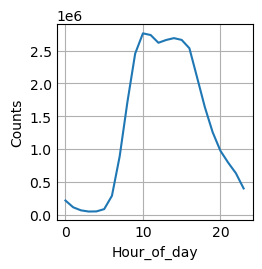

In [168]:
Q1_line_hour_of_day = sns.lineplot(data = new_df, x = 'Hour_of_day',y = 'Counts')

In [268]:
# export line chart
Q1_line_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis', 'answer_visualizations', 'Q1_line_hour_of_day.png'), bbox_inches='tight', dpi=200)

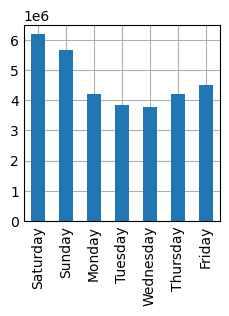

In [186]:
day_of_week_vc = ords_prods_all['order_day_of_week'].value_counts().rename({0:'Saturday', 1:'Sunday', 2:'Monday', 3:'Tuesday', 4:'Wednesday', 5:'Thursday', 6:'Friday'}).reindex(['Saturday', 'Sunday', 'Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday'])
Q1_bar_day_of_week = day_of_week_vc.plot.bar()

In [267]:
# export bar chart
Q1_bar_day_of_week.figure.savefig(os.path.join(path, '04 Analysis', 'answer_visualizations', 'Q1_bar_day_of_week.png'), bbox_inches='tight', dpi=200)

#### Q2
stacked bar chart containing products at different time

In [ ]:
Q2_line_hourOfDay_prices = sns.lineplot(data = ords_prods_all, x = 'order_hour_of_day',y = 'prices')

In [270]:
# export bar chart
Q2_line_hourOfDay_prices.figure.savefig(os.path.join(path, '04 Analysis', 'answer_visualizations', 'Q2_line_hourOfDay_prices.png'), bbox_inches='tight', dpi=200)

#### Q3 
price range grouping bar chart

In [201]:
# create df
price_range_vc = ords_prods_all['price_range'].value_counts()

In [202]:
price_range_vc

Mid-range product     21860860
Low-range product     10126321
High-range product      412551
Name: price_range, dtype: int64

Text(0.5, 0, 'Price range')

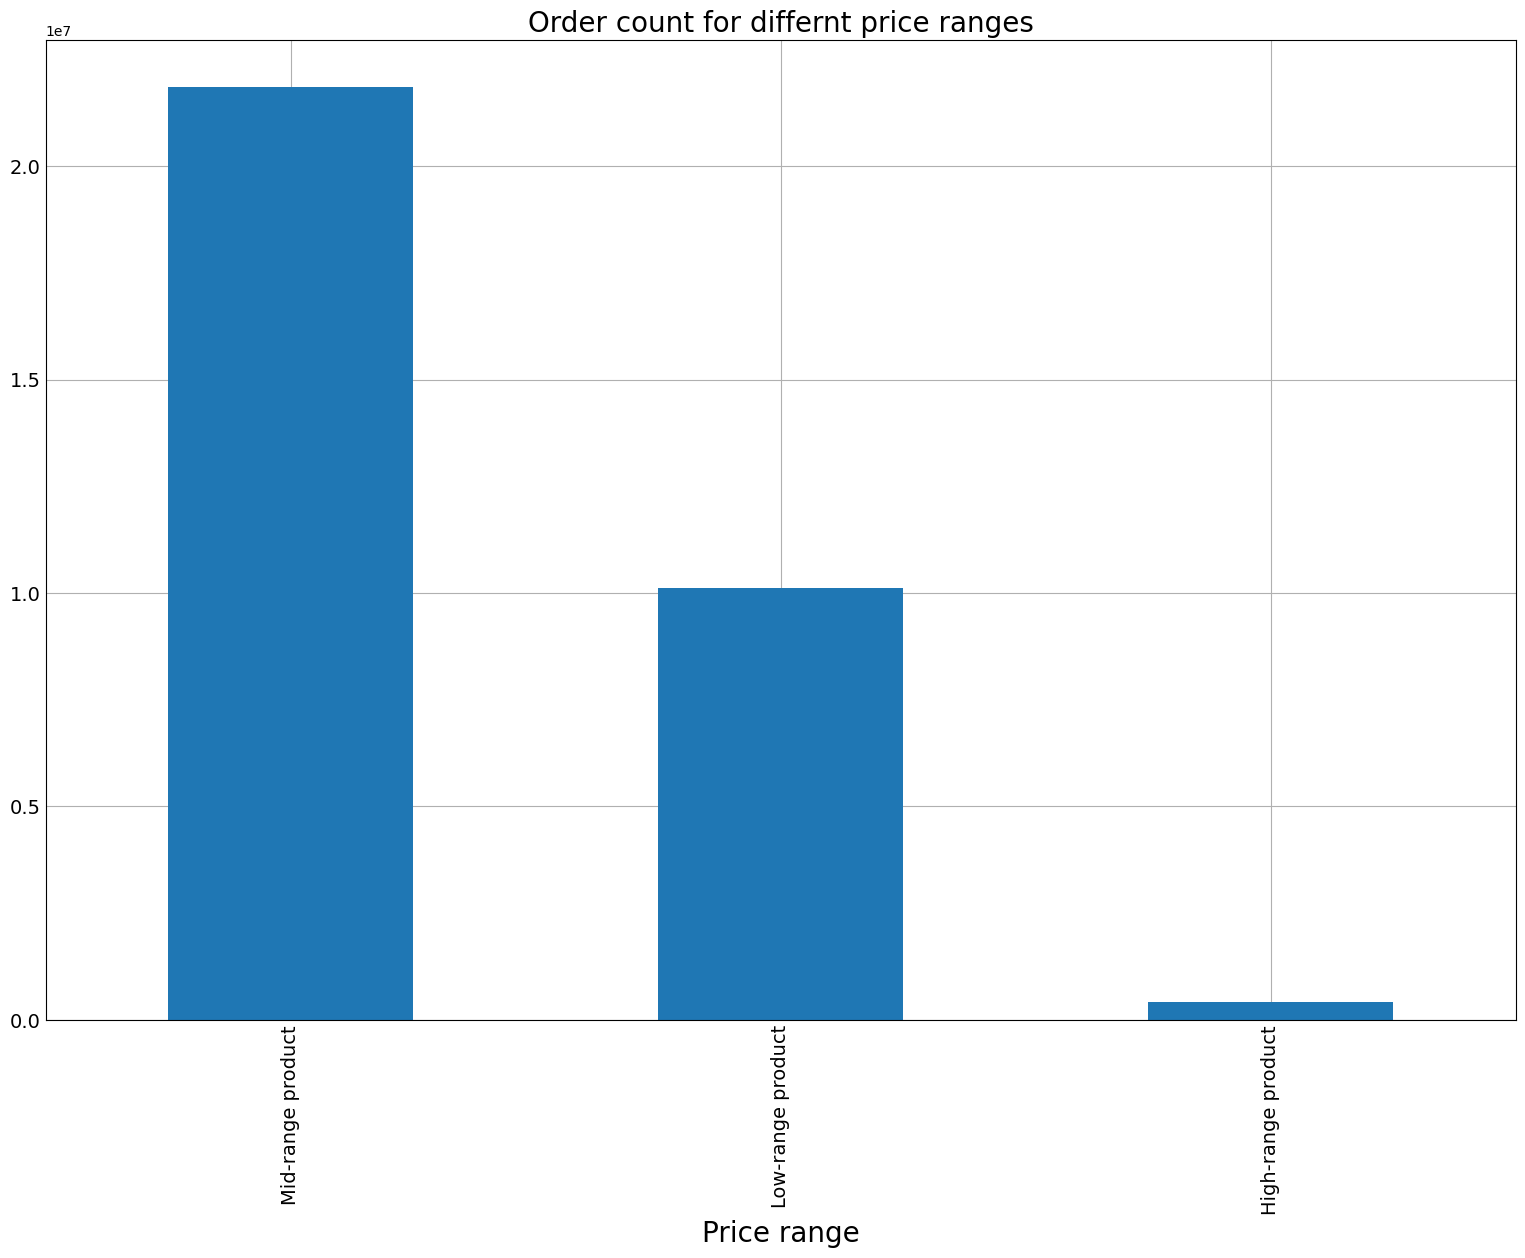

In [211]:
Q3_bar_price_range = price_range_vc.plot(kind='bar', colormap='tab10', figsize=(15, 10), fontsize=14)
plt.title("Order count for differnt price ranges", fontsize = 20)
plt.xlabel("Price range", fontsize = 20)

In [265]:
# export bar chart
Q3_bar_price_range.figure.savefig(os.path.join(path, '04 Analysis', 'answer_visualizations', 'Q3_bar_price_range.png'), bbox_inches='tight', dpi=200)

#### Q4 
department sales bar chart

In [214]:
department_vc = ords_prods_all['department'].value_counts()

In [215]:
department_vc

produce            9479291
dairy eggs         5393620
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alcohol             153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: department, dtype: int64

Text(0.5, 0, 'Department')

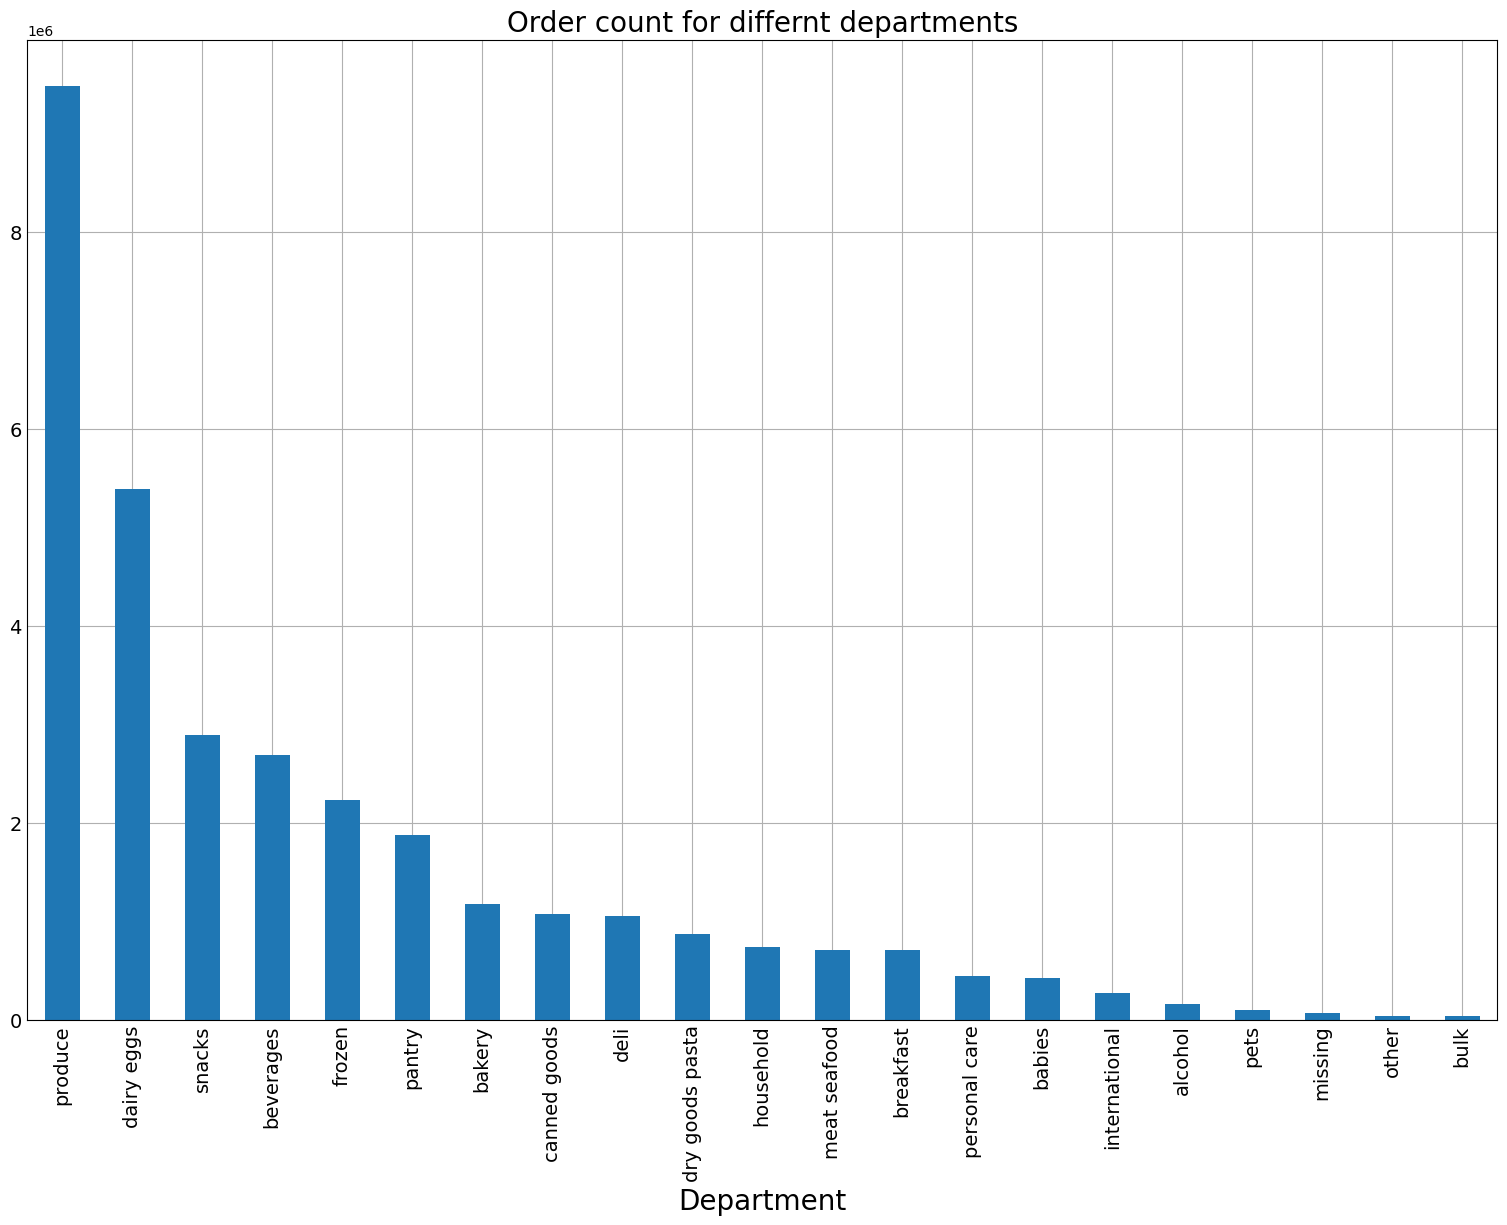

In [263]:
Q4_bar_departments = department_vc.plot(kind='bar', colormap='tab10', figsize=(15, 10),fontsize=14)
plt.title("Order count for differnt departments", fontsize = 20)
plt.xlabel("Department", fontsize = 20)

In [264]:
# export bar chart
Q4_bar_departments.figure.savefig(os.path.join(path, '04 Analysis', 'answer_visualizations', 'Q4_bar_departments.png'), bbox_inches='tight', dpi=200)

#### Q5 
order number bar chart

In [218]:
order_number_vc = ords_prods_all['order_number'].value_counts()

In [219]:
order_number_vc

1     2075745
3     2048476
2     2046061
4     1818284
5     1626608
       ...   
95      14514
96      13733
97      13353
98      12849
99      12419
Name: order_number, Length: 99, dtype: int64

Text(0, 0.5, 'Order count')

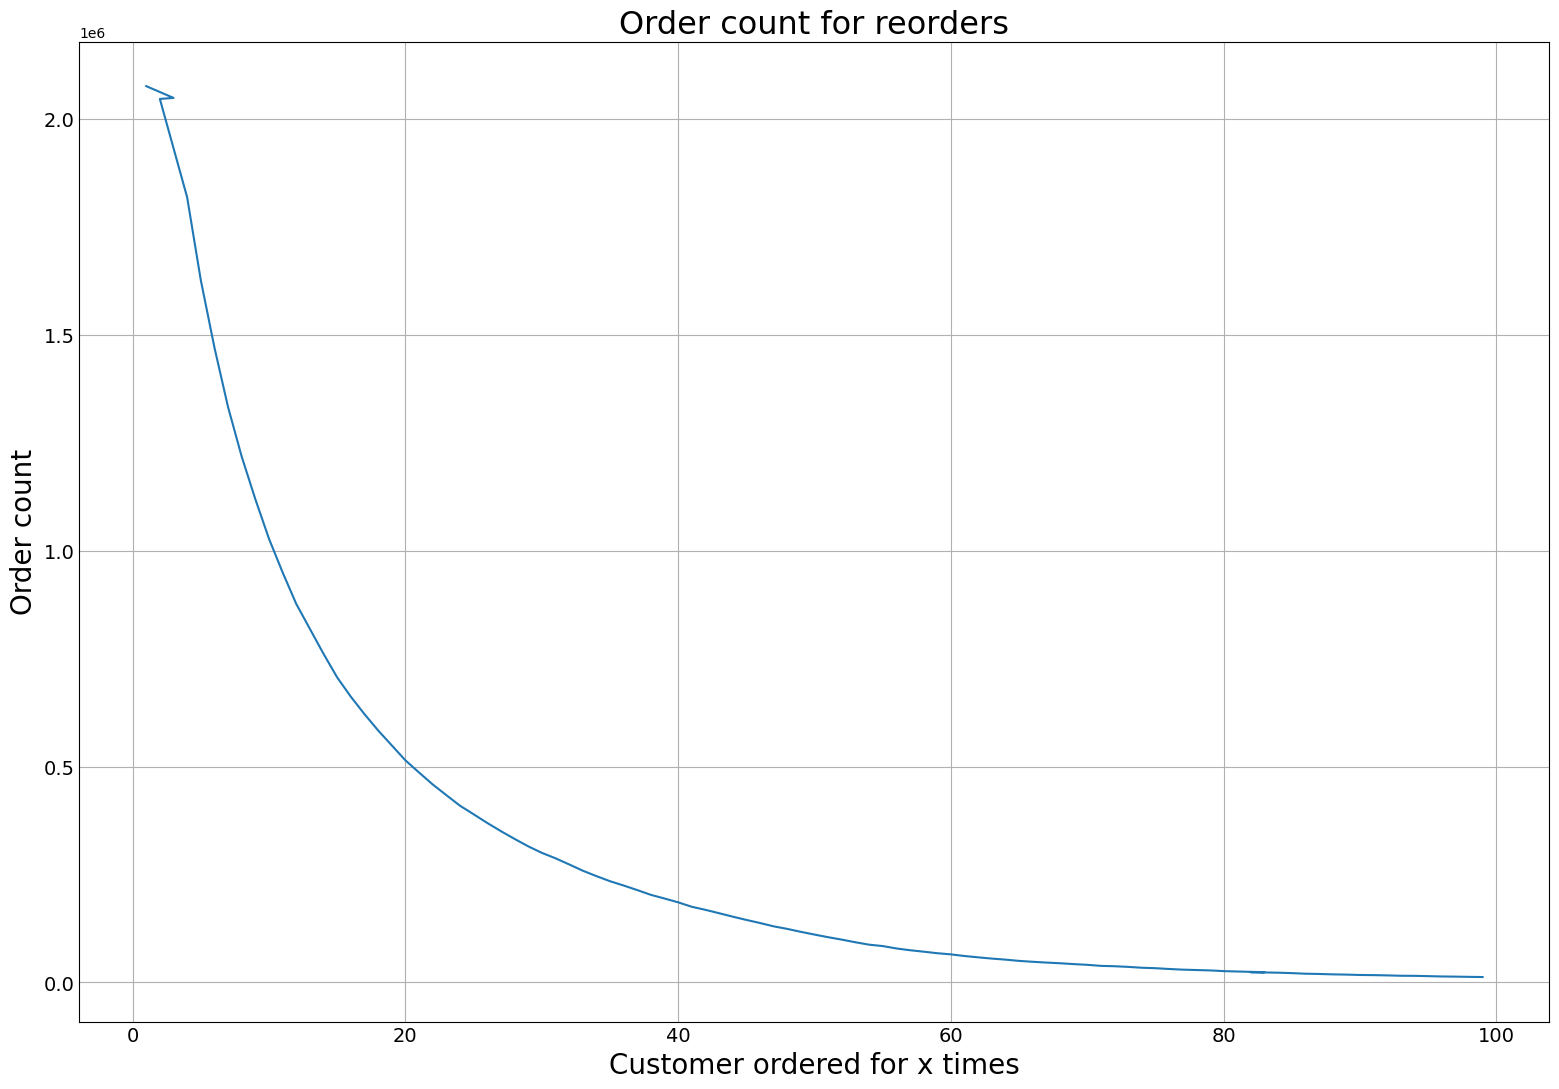

In [224]:
Q5_line_order_number = order_number_vc.plot(kind='line', colormap='tab10', figsize=(15, 10), fontsize=14)
plt.title("Order count for reorders", fontsize = 23)
plt.xlabel("Customer ordered for x times", fontsize = 20)
plt.ylabel("Order count", fontsize = 20)

In [261]:
# export bar chart
Q5_line_order_number.figure.savefig(os.path.join(path, '04 Analysis', 'answer_visualizations', 'Q5_line_order_number.png'), bbox_inches='tight', dpi=200)

#### Q6 
loyalty flag bar chart

In [228]:
loyalty_flag_vc = ords_prods_all['loyalty_flag'].value_counts()

In [229]:
loyalty_flag_vc

Regular customer    15874128
Loyal customer      10282763
New customer         6242841
Name: loyalty_flag, dtype: int64

Text(0, 0.5, 'Order count')

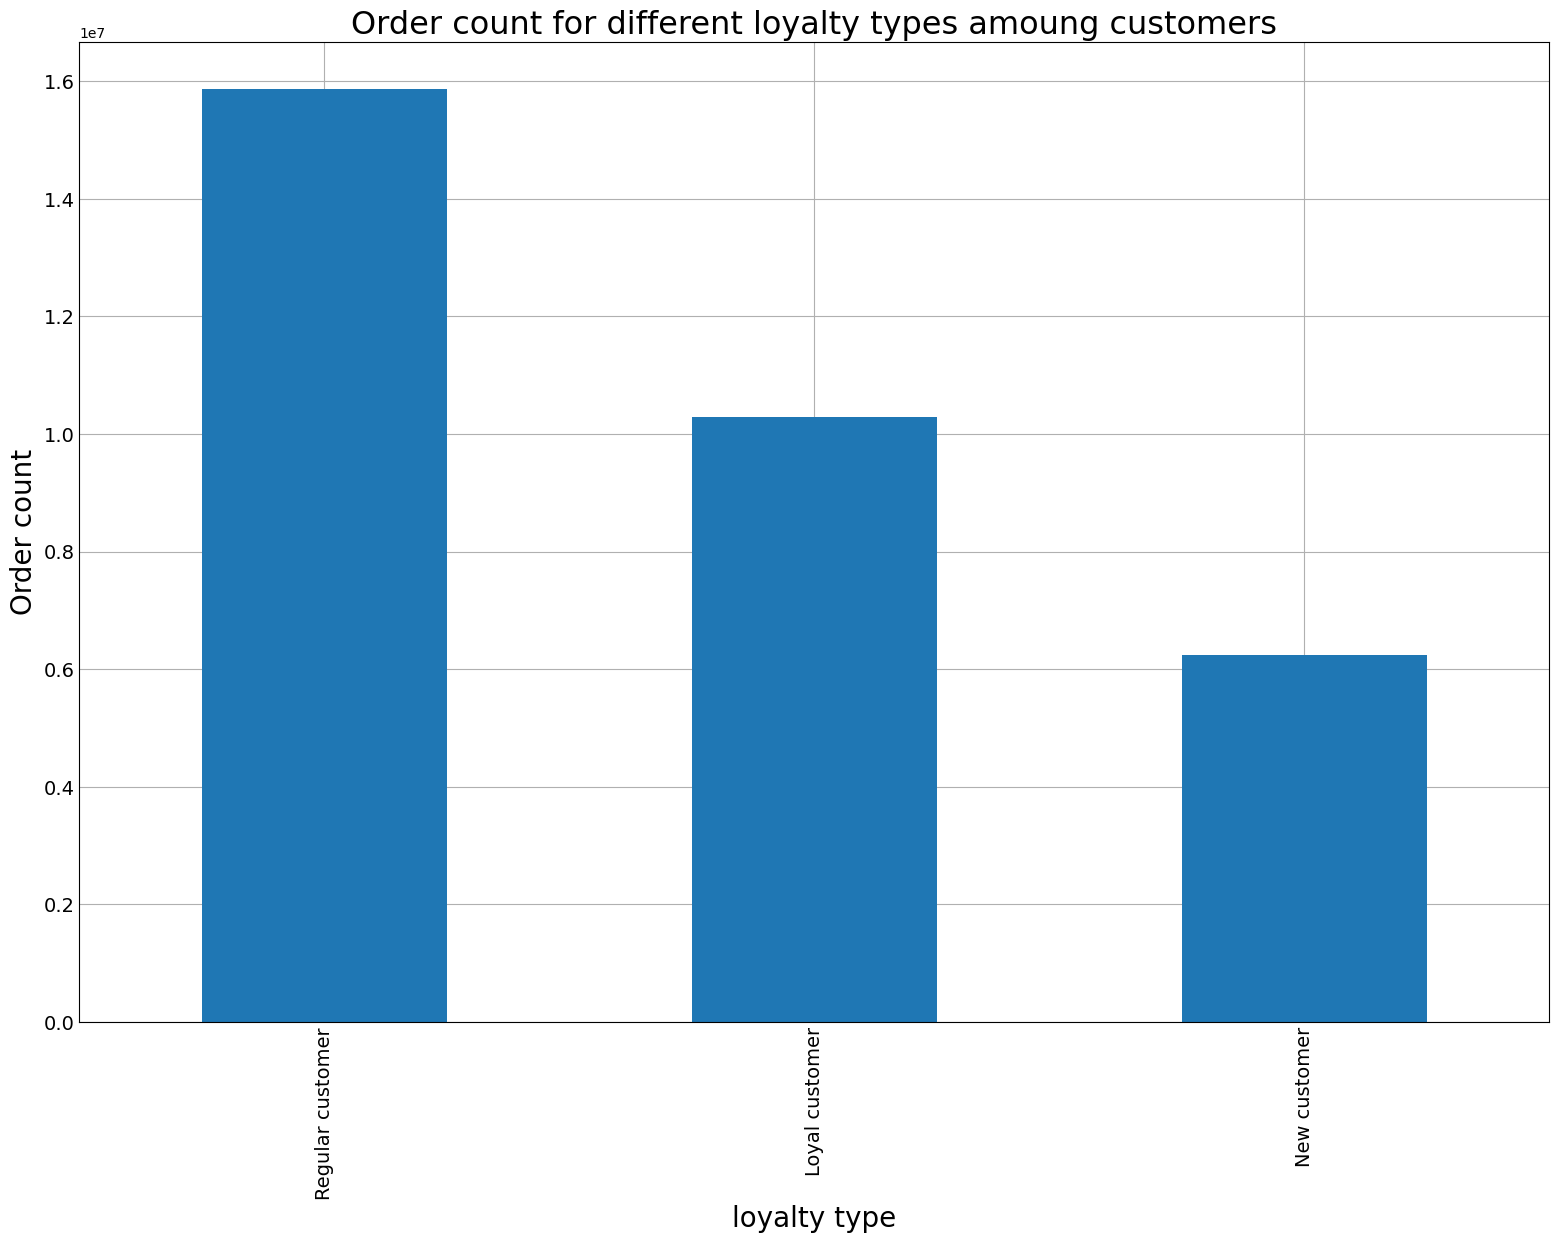

In [230]:
Q6_bar_loyalty_flag = loyalty_flag_vc.plot(kind='bar', colormap='tab10', figsize=(15, 10), fontsize=14)
plt.title("Order count for different loyalty types amoung customers", fontsize = 23)
plt.xlabel("loyalty type", fontsize = 20)
plt.ylabel("Order count", fontsize = 20)

In [259]:
# export bar chart
Q6_bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis', 'answer_visualizations', 'Q6_bar_loyalty_flag.png'), bbox_inches='tight', dpi=200)

#### Q7 
region bar chart

In [232]:
region_vc = ords_prods_all['region'].value_counts()

In [233]:
region_vc

Region 3    10790096
Region 4     8291679
Region 2     7596065
Region 1     5721892
Name: region, dtype: int64

Text(0, 0.5, 'Order count')

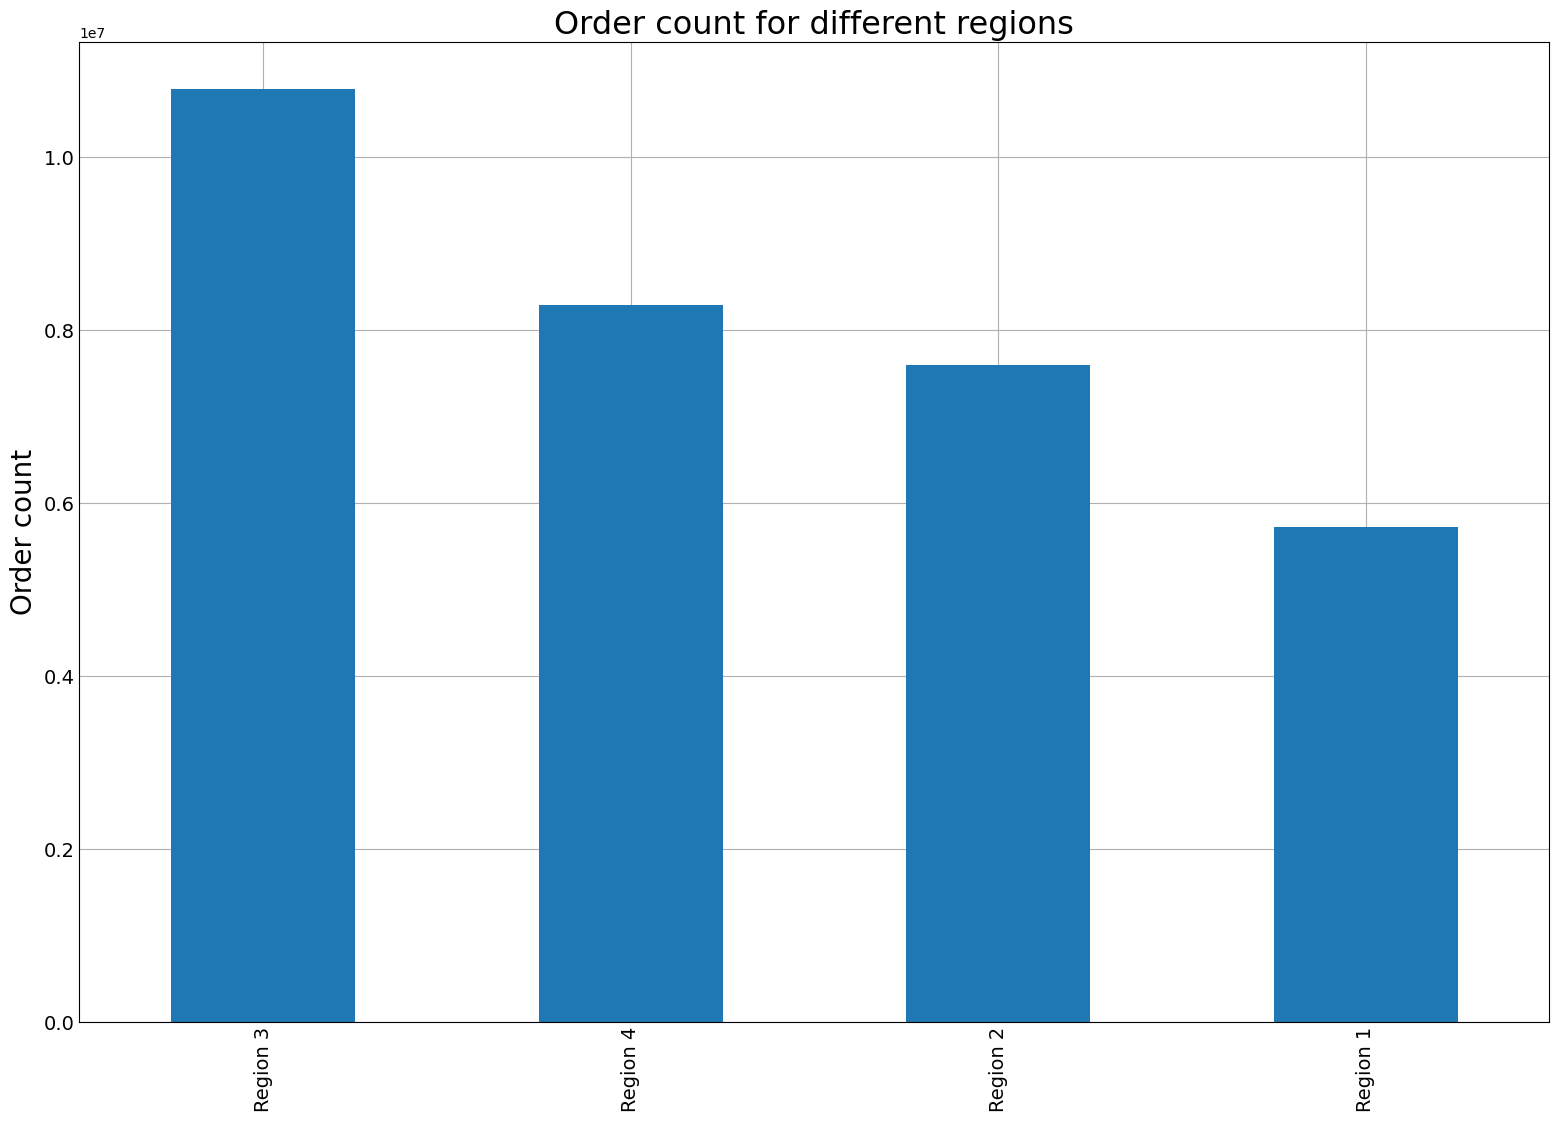

In [235]:
Q7_bar_region = region_vc.plot(kind='bar', colormap='tab10', figsize=(15, 10), fontsize=14)
plt.title("Order count for different regions", fontsize = 23)
plt.ylabel("Order count", fontsize = 20)

In [258]:
# export bar chart
Q7_bar_region.figure.savefig(os.path.join(path, '04 Analysis', 'answer_visualizations', 'Q7_bar_region.png'), bbox_inches='tight', dpi=200)

#### Q8 
crosstag age-family oder count chart

In [246]:
# create df
age_x_famStatus = pd.crosstab(ords_prods_all['fam_status'], ords_prods_all['age_profile'], dropna = False)

In [247]:
age_x_famStatus.head()

age_profile,adult,pensioner,young adult
fam_status,,,
divorced/widowed,773780,1997575,0
living with parents and siblings,0,0,1550402
married,13259972,6089261,3403822
single,3680869,0,1644051


Text(0.5, 0, 'Family status')

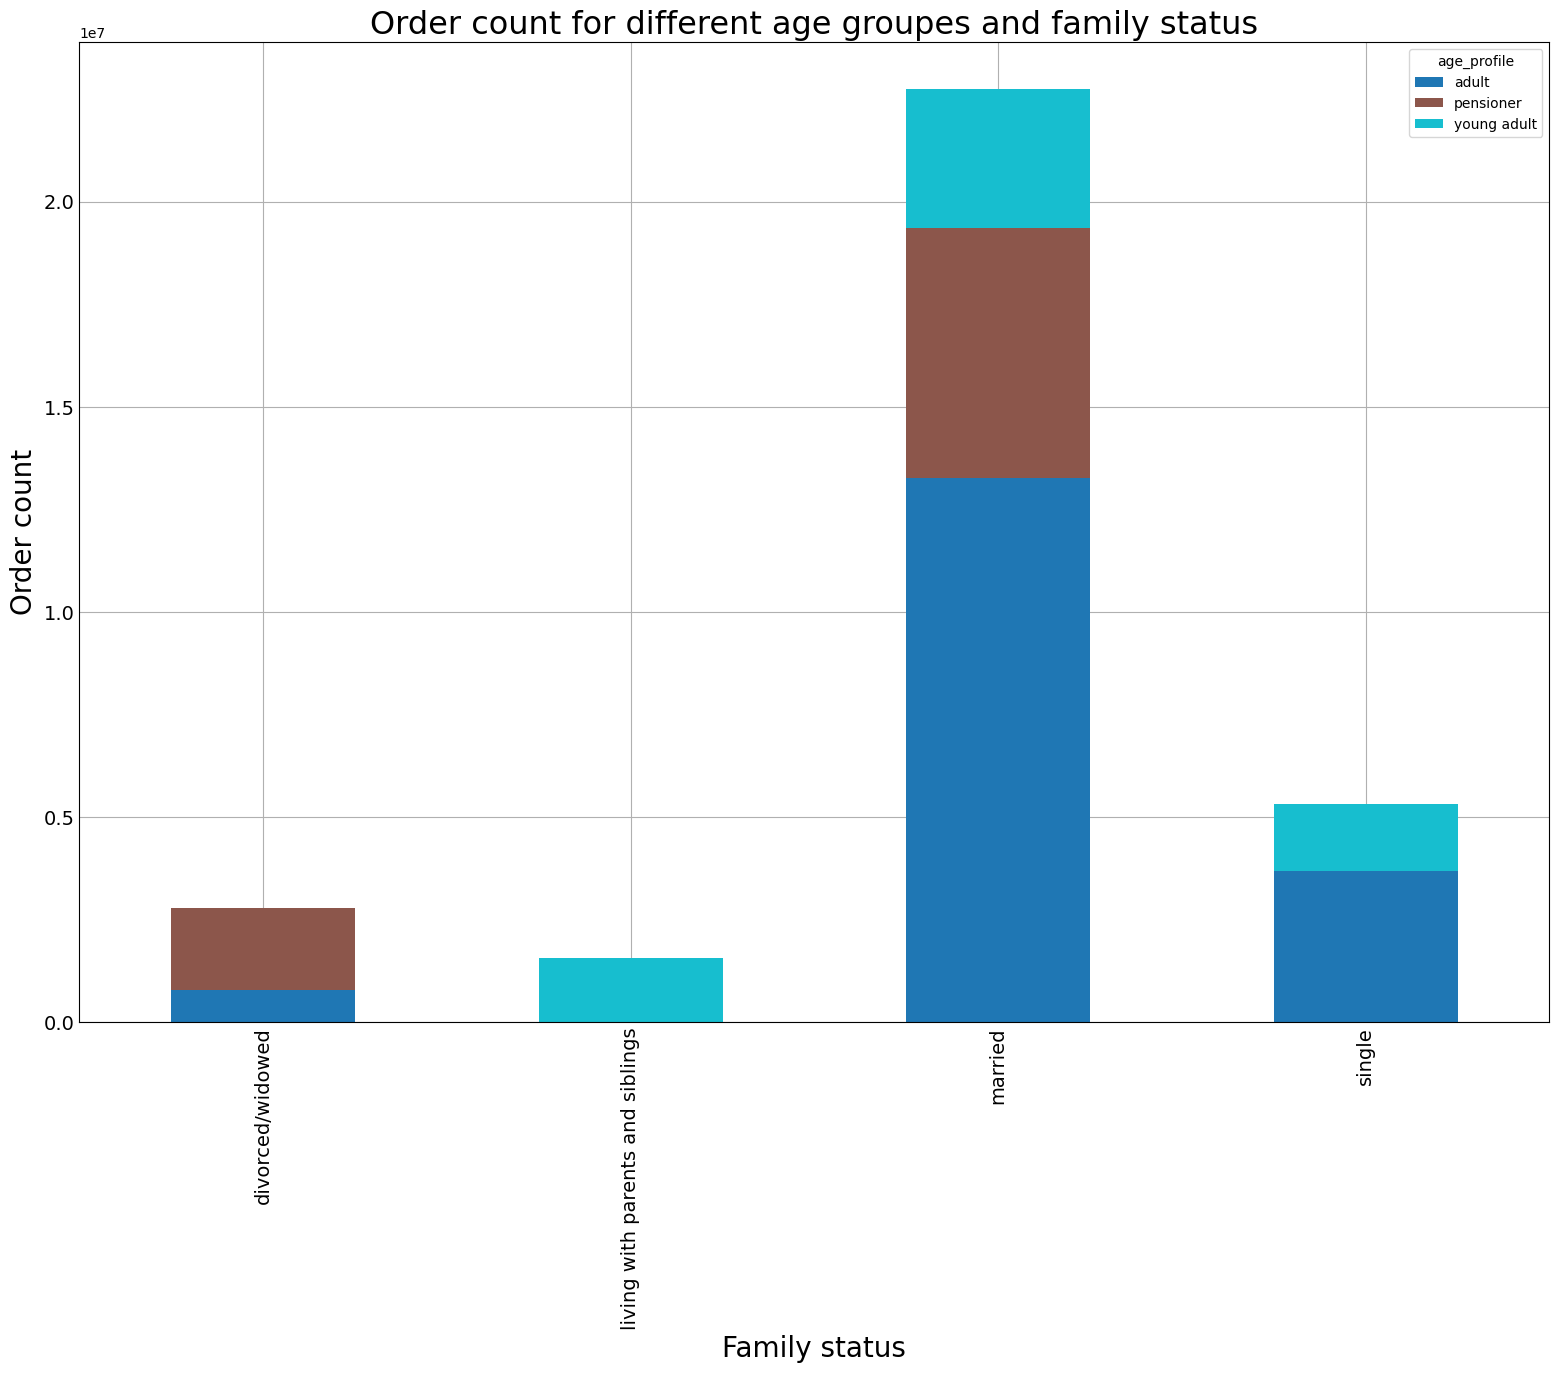

In [253]:
Q8_bar_ageProfile_x_famStatus = age_x_famStatus.plot(kind='bar', stacked=True, colormap='tab10', figsize=(15, 10), fontsize=14)
plt.title("Order count for different age groupes and family status", fontsize = 23)
plt.ylabel("Order count", fontsize = 20)
plt.xlabel("Family status", fontsize = 20)

In [257]:
# export bar chart
Q8_bar_ageProfile_x_famStatus.figure.savefig(os.path.join(path, '04 Analysis', 'answer_visualizations', 'Q8_bar_ageProfile_x_famStatus.png'),bbox_inches='tight', dpi=200)